In [3]:
import pandas as pd

# Load datasets
benin = pd.read_csv('../../data/benin_clean.csv')
sierra_leone = pd.read_csv('../../data/sierraleone_clean.csv')
togo = pd.read_csv('../../data/togo_clean.csv')

# Add country labels
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all datasets
df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_14300\907062183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


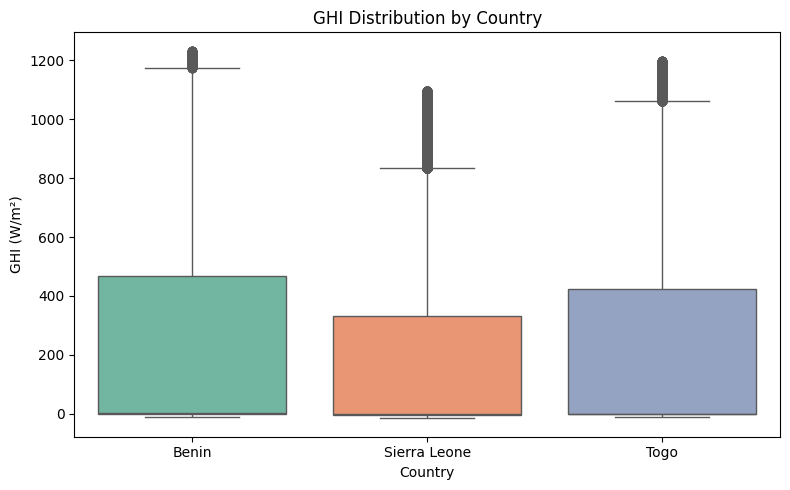

C:\Users\HP\AppData\Local\Temp\ipykernel_14300\907062183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


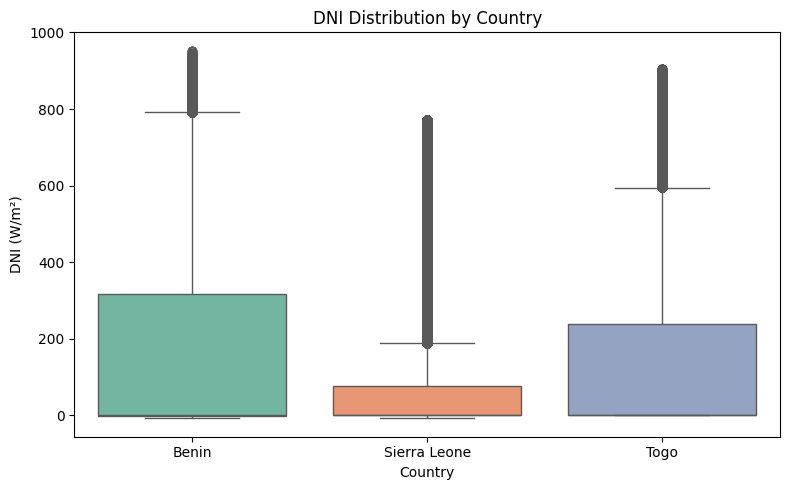

C:\Users\HP\AppData\Local\Temp\ipykernel_14300\907062183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


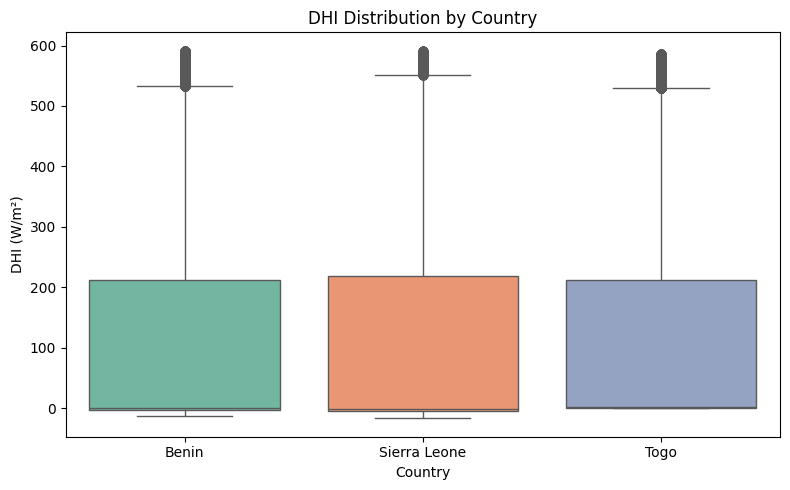

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xlabel('Country')
    plt.tight_layout()
    plt.show()


In [5]:
summary_stats = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
summary_stats


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.27    0.7  328.33  166.92   -0.1  262.11  111.67    0.5   
Sierra Leone  185.39   -0.4  279.56  104.39   -0.1  201.30  108.24   -0.6   
Togo          223.92    0.5  317.39  148.02    0.0  247.73  112.80    1.5   

                      
                 std  
Country               
Benin         153.11  
Sierra Leone  153.81  
Togo          151.59

In [6]:
from scipy.stats import kruskal

ghi_benin = benin['GHI']
ghi_sierra = sierra_leone['GHI']
ghi_togo = togo['GHI']

stat, p_value = kruskal(ghi_benin, ghi_sierra, ghi_togo)
print(f"Kruskal–Wallis test statistic: {stat:.3f}, p-value: {p_value:.4f}")


Kruskal–Wallis test statistic: 6480.642, p-value: 0.0000


### Key Observations

- Benin shows the **highest median GHI** but also the **greatest variability**, suggesting potential hotspots with high solar yield.
- Sierra Leone has **lower average DNI**, indicating lower direct sunlight compared to Benin and Togo.
- All three countries exhibit statistically significant differences in GHI distributions (p-value < 0.05).

C:\Users\HP\AppData\Local\Temp\ipykernel_14300\2415274504.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='coolwarm')


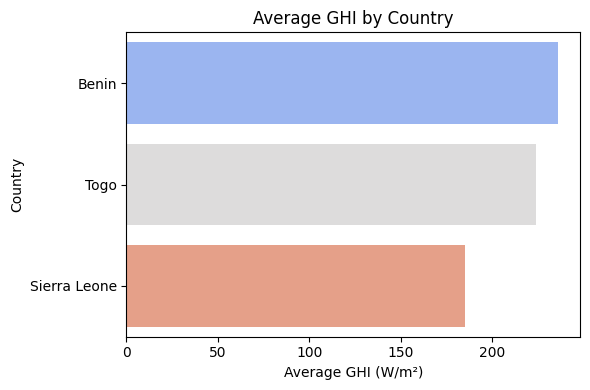

In [7]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='coolwarm')
plt.xlabel('Average GHI (W/m²)')
plt.title('Average GHI by Country')
plt.tight_layout()
plt.show()
